# Backtest 기본 예제

In [1]:
# import libraries

import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import matplotlib.pyplot as plt

입력된 기간의 주가를 가져옵니다.

In [2]:
start = datetime(2019,1,1)
end = datetime(2019,1,31)
data = web.DataReader("AAPL", "yahoo", start, end)
# data = pd.read_csv("../data/LKTB_DAILY.csv")


데이터의 내용을 확인합니다.

In [3]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-31,159.360001,156.479996,158.529999,157.740005,35003500,155.037109
2019-01-02,158.850006,154.229996,154.889999,157.919998,37039700,155.214005
2019-01-03,145.720001,142.000000,143.979996,142.190002,91312200,139.753540
2019-01-04,148.550003,143.800003,144.529999,148.259995,58607100,145.719513
2019-01-07,148.830002,145.899994,148.699997,147.929993,54777800,145.395203


데이터중 수정종가('Adj Close')을 그려봅니다.

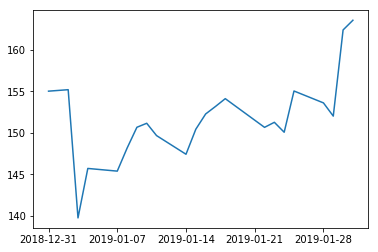

In [4]:
plt.plot(data.index,data['Adj Close'])

초기 투자금액, 거래 수수료등을 세팅해주는 initialize 함수 :  그대로 사용합니다.

In [5]:
def initialize(context):
    pass

주문을 실행하는 order 함수, 참조할 데이터에 대한 심볼을 등록하는 symbol함수 import.<br>
order함수를 사용해 심볼이 'AAPL'인 주식 한주를 매수하도록 구현합니다.

In [6]:
from zipline.api import order, symbol

def handle_data(context, data):
    order(symbol('AAPL'), 1)

수정종가만으로 새로운 DataFrame객체를 생성합니다. *Series는 안됨.

In [7]:
data = data[['Adj Close']]
data.head()

,Adj Close
Date,
2018-12-31,155.037109
2019-01-02,155.214005
2019-01-03,139.753540
2019-01-04,145.719513
2019-01-07,145.395203


handle_data 함수내에 있는 symbol('AAPL') 에 맞추어 컬럼명을 AAPL로 바꿔줍니다.

In [8]:
data.columns = ["AAPL"]
data.head()

,AAPL
Date,
2018-12-31,155.037109
2019-01-02,155.214005
2019-01-03,139.753540
2019-01-04,145.719513
2019-01-07,145.395203


DataFrame 객체의 인덱스 값을 협정 세계시(UTC)로 변경합니다.(왜?)

In [9]:
data = data.tz_localize("UTC")
data.head()

,AAPL
Date,
2018-12-31 00:00:00+00:00,155.037109
2019-01-02 00:00:00+00:00,155.214005
2019-01-03 00:00:00+00:00,139.753540
2019-01-04 00:00:00+00:00,145.719513
2019-01-07 00:00:00+00:00,145.395203


In [10]:
data.shape

(22, 1)

이로써 백테스팅을 위한 모든 준비를 마쳤습니다. 지금부터는 백테스팅을 실제로 수행해보겠습니다. Zipline에서 백테스팅에는 TradingAlgorithm이라는 클래스의 인스턴스를 사용합니다. 먼저 해당 클래스를 사용하기 위해 임포트합니다.

In [11]:
from zipline.algorithm import TradingAlgorithm

TradingAlgorithm 클래스의 인스턴스를 생성할 때 앞서 구현한 초기화 함수, 알고리즘이 구현된 함수를 인자로 전달하면 됩니다.

In [12]:
import zipline
zipline.__file__

'/opt/conda/envs/backtest/lib/python3.5/site-packages/zipline/__init__.py'

In [13]:
algo = TradingAlgorithm(initialize=initialize, handle_data=handle_data)

TradingAlgorithm 객체가 정상적으로 생성되면 run 메서드를 호출해 시뮬레이션을 수행할 수 있습니다. 이때 run 메서드의 인자로 시뮬레이션에 사용될 데이터인 DataFrame 객체를 전달하면 됩니다. run 메서드가 수행된 후 시뮬레이션의 결과값은 result에 저장됩니다.

In [14]:
result = algo.run(data)

/opt/conda/envs/backtest/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  """Entry point for launching an IPython kernel.


시뮬레이션이 정상적으로 수행됐다면 result의 값을 확인해봅니다. 참고로 result는 pandas의 DataFrame 객체로서 그림 14.18과 같이 head 메서드를 통해 간단히 값을 확인해 봅시다.

In [15]:
result.head()

,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2018-12-31 21:00:00+00:00,NaN,0.000000e+00,None,0.0,NaN,None,0.000000,100000.000000,0.000000,0.000000,...,0.0,0.0,0,NaN,100000.000000,0.000000,0.000000,1,[],0.0
2019-01-02 21:00:00+00:00,0.000009,-7.860700e-07,None,0.0,0.0,None,-155.292612,99844.707388,155.214005,155.214005,...,0.0,0.0,0,-11.224972,100000.000000,0.000000,0.000000,2,"[{'amount': 1, 'commission': None, 'sid': Equi...",0.0
2019-01-03 21:00:00+00:00,0.001420,-1.560995e-04,None,0.0,0.0,None,-139.824417,99704.882972,279.507080,279.507080,...,0.0,0.0,0,-9.211420,99844.707388,155.214005,155.214005,3,"[{'amount': 1, 'commission': None, 'sid': Equi...",0.0
2019-01-04 21:00:00+00:00,0.001783,-3.751862e-05,None,0.0,0.0,None,-145.793373,99559.089599,437.158539,437.158539,...,0.0,0.0,0,-1.916414,99704.882972,279.507080,279.507080,4,"[{'amount': 1, 'commission': None, 'sid': Equi...",0.0
2019-01-07 21:00:00+00:00,0.001544,-4.798491e-05,None,0.0,0.0,None,-145.468900,99413.620699,581.580811,581.580811,...,0.0,0.0,0,-2.187551,99559.089599,437.158539,437.158539,5,"[{'amount': 1, 'commission': None, 'sid': Equi...",0.0


## 일별 매수 알고리즘 시뮬레이션 결과

result에는 일자별로 다양한 데이터가 저장돼 있습니다. 그중 'starting_cash'는 각 거래일의 개장 전의 보유 현금이고 'ending_cash'는 시장 종료 후 보유 현금입니다. 'ending_value'는 각 거래일의 시장종료후의보유주식에대한평가금액입니다.<br>

'starting_cash', 'ending_cash', 'ending_value'는 DataFrame 객체의 칼럼 인덱스이므로 이를 이용해 시뮬레이션 초기 시점의 값을 확인해 봅시다. 거래는 2010-01-04일부터 시작됐는데 해당 일자에는 주식 1주의 매수 주문이 체결되지 않았기 때문에 'starting_cash'와 'ending_cash'가 시뮬레이션 초기 금액인 100,000달러입니다. 주문이 체결되지 않았기 때문에 평가 금액인 'ending_value'는 0임을 확인할 수 있습니다.

In [16]:
result[['starting_cash', 'ending_cash', 'ending_value']].head()

,starting_cash,ending_cash,ending_value
2018-12-31 21:00:00+00:00,100000.000000,100000.000000,0.000000
2019-01-02 21:00:00+00:00,100000.000000,99844.707388,155.214005
2019-01-03 21:00:00+00:00,99844.707388,99704.882972,279.507080
2019-01-04 21:00:00+00:00,99704.882972,99559.089599,437.158539
2019-01-07 21:00:00+00:00,99559.089599,99413.620699,581.580811


여러분이 투자하는 동안 관심 있는 것은 아마도 보유 현금과 주식 평가 금액을 합산한 금액일 것입니다. 특정 시점에서 이 금액이 초기 투자 금액보다 높다면 여러분은 주식 투자를 통해 수익을 낸 것이 됩니다. 이 값은 앞서 살펴본 'ending_cash'와 'ending_value'를 합산해서 계산할 수도 있지만 'portfolio_value' 칼럼을 통해 바로 확인할 수 있습니다.

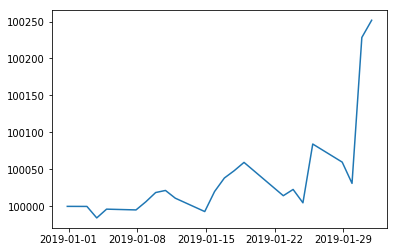

In [17]:
plt.plot(result.index, result.portfolio_value)
plt.show()

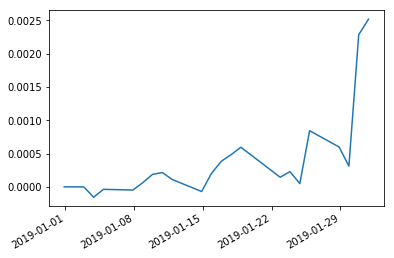

In [18]:
result.portfolio_value.pct_change().fillna(0).add(1).cumprod().sub(1).plot(label='portfolio')